### Ігор Конобас (ТТП-41) варіант 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

%matplotlib inline


In [2]:
data = pd.read_csv('data.csv')
P, D, S = data['Price'].values, data['Demand'].values, data['Supply'].values
data

Price  Demand  Supply
0    0.75     600     200
1    0.98     510     250
2    1.23     500     275
3    2.05     450     306
4    2.78     420     375
5    3.45     390     424
6    4.15     370     480
7    4.99     350     500
8    5.26     328     549
9    6.13     300     625
10   7.50     250     678

In [3]:
def plot(*args, x='Quantity', y='Price', **kw):
    plt.figure(figsize=(15, 10))
    plt.plot(*args)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(kw['legend'])
    plt.title(kw['title'])
    plt.show()

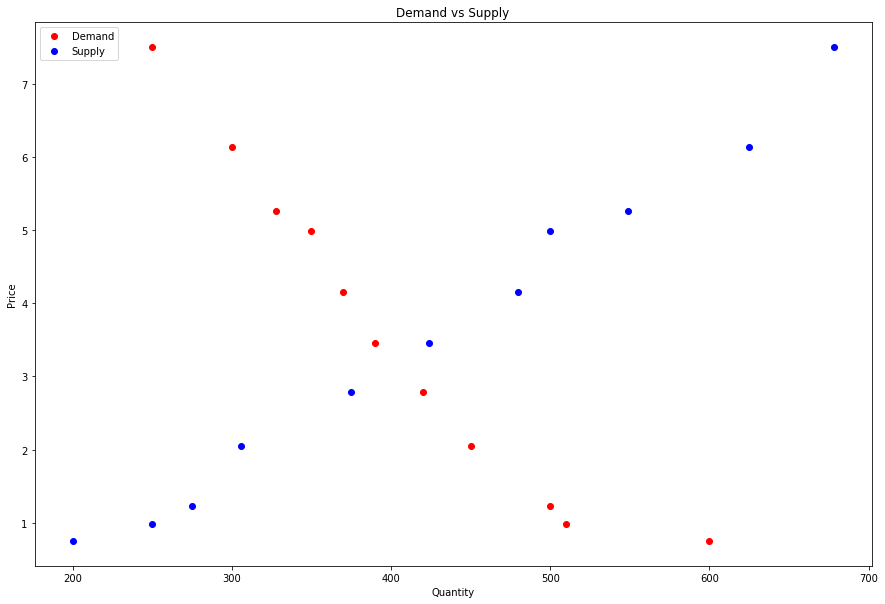

In [4]:
plot(D, P, 'ro', S, P, 'bo', legend=['Demand', 'Supply'], title='Demand vs Supply')

## Апроксимація

In [5]:
def coefficient(x, y, function):
    c, _ = curve_fit(function, x, y)
    return c

Апроксимація попиту
$$Q_d(P) = \frac{a}{e^{bP} + c}$$

In [6]:
def demand_func(x, a, b, c): return a / (np.exp(b*x) + c)
demand_func_coefficient = coefficient(P, D, demand_func)

Апроксимація фунції пропозиції
$$Q_s(P) = l\log{P} + m$$

In [7]:
def supply_func(x, l, m): return l*np.log(x) + m
supply_func_coefficient = coefficient(P, S,  supply_func)

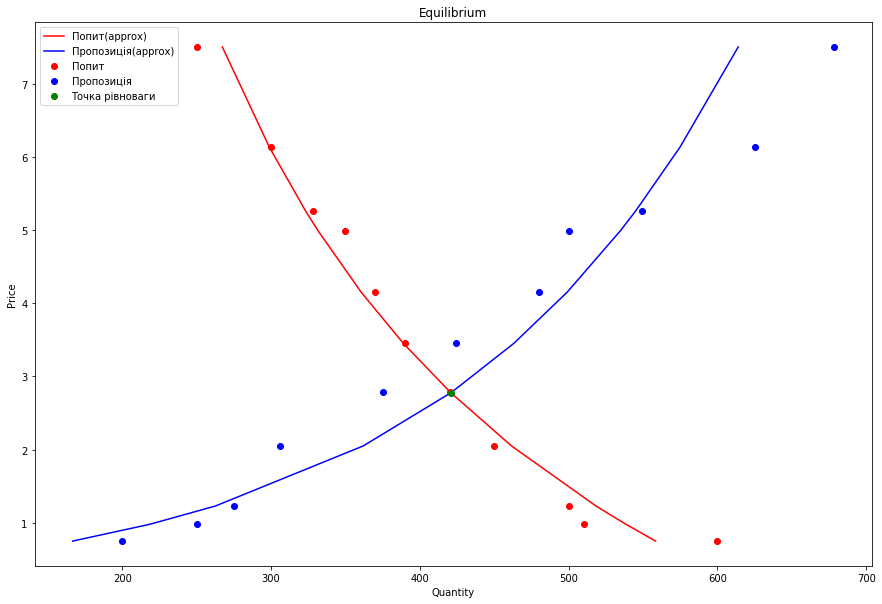

'Точка рівноваги (420.86, 2.78)'

In [8]:
def diff(x): return abs(demand_func(x, *demand_func_coefficient) - supply_func(x,*supply_func_coefficient))

bounds = (P.min(), P.max())
equilibrium_price = minimize(diff, 1, bounds=[bounds]).x[0]
equilibrium_quantity = demand_func(equilibrium_price, *demand_func_coefficient)
plot(demand_func(P, *demand_func_coefficient), P, 'r-', supply_func(P, *supply_func_coefficient), P, 'b-', D, P, 'ro', S, P, 'bo', equilibrium_quantity, equilibrium_price, 'go',
     legend=['Попит(approx)', 'Пропозиція(approx)', 'Попит', 'Пропозиція', 'Точка рівноваги'], title='Equilibrium')
'Точка рівноваги ({0:.2f}, {1:.2f})'.format(equilibrium_quantity, equilibrium_price)

## Еластичність

За означенням
$$E = \frac{dQ}{dP} \cdot \frac{P}{Q}$$

Для попиту маємо
$$Q_d = \frac{a}{e^{bP}+c}$$

для пропозиції
$$Q_s = l\log{P}+m$$



In [9]:
demand_func_coefficient, supply_func_coefficient

(array([ 1.50668079e-01,  4.35436052e-05, -9.99762859e-01]),
 array([194.26853888, 222.54595522]))

Оскільки $a = 0.15, b = 0.00004, c = -0.99, l = 194.2, m = 222.5$, маємо

$$E_d = -\frac{0.00004 \cdot Pe^{0.00004 P}}{e^{0.00004 P}-0.99}$$

$$E_s = \frac{-0.99}{-0.99\log{P}+222.5}$$

Еластичність в точці рівноваги

In [10]:
def elasticity_d(p): return -demand_func_coefficient[1]*p*np.exp(demand_func_coefficient[1]*p) / (np.exp(demand_func_coefficient[1]*p) - demand_func_coefficient[2])
def elasticity_s(p): return supply_func_coefficient[0] / (supply_func_coefficient[0]*np.log(p) + supply_func_coefficient[1])

print('Еластичність попиту: {0:.2f}'.format(elasticity_d(equilibrium_price)))
print('Еластичність пропозиції: {0:.2f}'.format(elasticity_s(equilibrium_price)))

Еластичність попиту: -0.00
Еластичність пропозиції: 0.46


Оскільки $|E_d(e_p)| < |E_s(e_p)|$ еластичність **не стабільна**.

## Дугова еластичність

$$E_{arc} = \frac{Q_n - Q_1}{P_n - P_1} \frac{\frac{\sum_{i=1}^n P_i }{n}}{\frac{\sum_{i=1}^n Q_i }{n}} = \frac{Q_n - Q_1}{P_n - P_1} \frac{\sum_{i=1}^n P_i }{\sum_{i=1}^n Q_i }$$

In [11]:
def arc_elasticity(P, Q): return (Q[-1] - Q[0]) / (P[-1] - P[0]) * np.sum(P) / np.sum(Q)

print('Дугова еласитичність попиту: {0:.2f}'.format(arc_elasticity(D, P)))
print('Дугова еластичністо пропозиції: {0:.2f}'.format(arc_elasticity(S, P)))

Дугова еласитичність попиту: -2.19
Дугова еластичністо пропозиції: 1.68


## Податок в пропозиції

$$Q_{taxed}(P) = Q(P - tax)$$

Застосуємо цю функцію

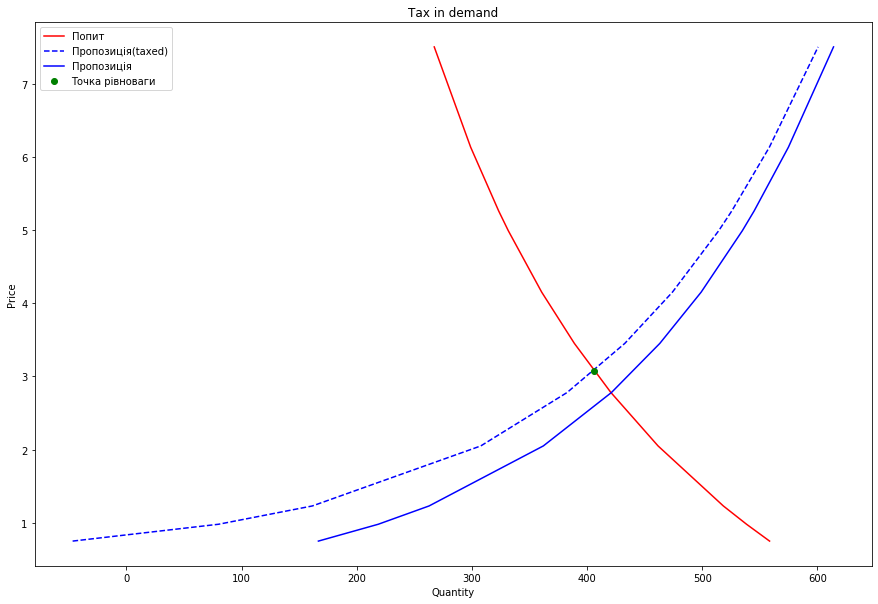

'Точка рівноваги (406.15, 3.07)'

In [12]:
def taxed_d_f(x): return supply_func(x - 0.5, *supply_func_coefficient)
def diff(x): return abs(taxed_d_f(x) - demand_func(x, *demand_func_coefficient))

equilibrium_price = minimize(diff, 1, bounds=[bounds]).x[0]
equilibrium_quantity = demand_func(equilibrium_price, *demand_func_coefficient)
plot(demand_func(P, *demand_func_coefficient), P, 'r-', taxed_d_f(P), P, 'b--', supply_func(P, *supply_func_coefficient), P, 'b-', equilibrium_quantity, equilibrium_price, 'go',
    legend=['Попит', 'Пропозиція(taxed)', 'Пропозиція', 'Точка рівноваги'], title='Tax in demand')
'Точка рівноваги ({0:.2f}, {1:.2f})'.format(equilibrium_quantity, equilibrium_price)